# SD212: Graph mining
## Lab 5: Clustering

You will learn how to cluster the nodes of a graph and to estimate the quality of the clustering. 

## Import

In [1]:
import networkx as nx

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [2]:
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib.pyplot as plt

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Data

You will need the following datasets (the same as in previous labs, no need to download them again):
* [Les Misérables](http://perso.telecom-paristech.fr/~bonald/graphs/miserables.graphml.gz)<br>  Graph connecting the characters of the [novel of Victor Hugo](https://fr.wikisource.org/wiki/Les_Misérables) when they appear in the same chapter. The graph is undirected and weighted. Weights correspond to the number of chapters in which characters appear together. 
* [Openflights](http://perso.telecom-paristech.fr/~bonald/graphs/openflights.graphml.gz)<br>
Graph of the main international flights. Nodes are airports. The graph is undirected (all flights are bidirectional). Weights correspond to the number of daily flights between airports. Extracted from [Openflights](http://openflights.org).
* [Wikipedia for schools](http://perso.telecom-paristech.fr/~bonald/graphs/wikipedia_schools.graphml.gz)<br> Graph of the hyperlinks between a subset of the pages of the English Wikipedia. The graph is directed and unweighted.
More information [here](https://en.wikipedia.org/wiki/Wikipedia:Wikipedia_for_Schools).
* [Actors-Movies](http://perso.telecom-paristech.fr/~bonald/graphs/actors_movies.graphml.gz)<br>
Graph between actors and movies (a link exists if the actor stars in the movie). The graph is bipartite (see the field 'type' of each node). 
Extracted from [YaGo](http://yago-knowledge.org).

## 1. Modularity

Consider an undirected, unweighted graph of $n$ nodes and $m$ edges with adjacency matrix $A$, without self-loops.

The modularity of clustering $C$ is defined by:
$$
Q(C) = \frac 1 {2m} \sum_{i,j\in V} \left(A_{ij} - \frac {d_id_j}{2m}\right) \delta_{C(i),C(j)}
$$
where $d_i = \sum_j A_{ij}$ is the degree of node $i$.

The modularity can also be written:
$$
Q(C) = \sum_k  \frac{m_k}{m} - \sum_k  \left( \frac{v_k}{v}\right)^2
$$
where
* $m_k$ is the number of edges in cluster $k$  
* $v_k $ is the volume of cluster $k$ (total degree of nodes in the cluster)
* $v$ is the volume of the graph (total degree of nodes)

The definition extends to a weighted graph as follows:
$$
Q(C) = \sum_k  \frac{w_k}{w} - \sum_k  \left( \frac{v_k}{v}\right)^2
$$
where
* $w_k$ is the weight of cluster $k$ (total weight of edges in the cluster)
* $w$ is the weight of the graph (total weight of edges in the graph)

## Toy graph

Consider the following graph:

In [6]:
edges = [(7,5),(5,3),(3,7),(4,5),(8,6),(7,4),(1,6),(9,8),(7,8),(2,9),(8,2),(1,9)]
graph = nx.Graph()
graph.add_edges_from(edges)

with the following clustering:

In [7]:
C = {1: 0, 2: 0, 6: 0, 8: 0, 9: 0, 3: 1, 4: 1, 5: 1, 7: 1}

Visualization:

In [8]:
pos = nx.spring_layout(graph)

In [9]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [10]:
node_colors = [colors[C[u] % len(colors)] for u in graph.nodes()]

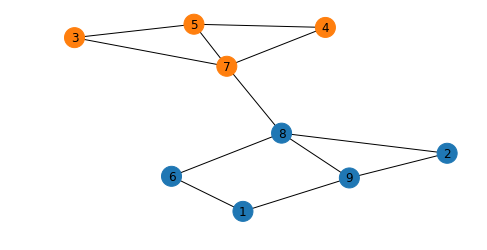

In [11]:
plt.figure(figsize = (6,3))
nx.draw(graph, pos, node_size = 400, node_color = node_colors, with_labels = True)
plt.show()

## To do

* What is the fraction of edges within clusters?

In [12]:
Fraction_edge = 7/12+6/12
Fraction_edge

1.0833333333333335

## To do

* What is the Simpson's index associated with the volume distribution between clusters?

In [13]:
#somme (vk/v)^2
Simpson_index = ((graph.degree(7)+graph.degree(4)+graph.degree(5)+graph.degree(3))/24)**2 +((graph.degree(1)+graph.degree(2)+graph.degree(6)+graph.degree(8)+graph.degree(9))/24)**2 
Simpson_index

0.5034722222222221

## To do

* Deduce the modularity of the clustering. 

In [143]:
Fraction_edge - Simpson_index

0.5798611111111114

## To do

* What is the maximum value of modularity for 2 clusters?

????????????????????????????????????????????????

????????????????????????????????????????????????

## To do

* Complete the function `get_modularity` below and check it on the above graph.

In [365]:
def get_modularity(graph,C):
    '''
    graph: networkx graph
        undirected graph (possibly weighted)
    C: dictionary
        cluster of each node
        
    Returns: float
        modularity
    '''
    
    # add weights if none
    if nx.get_edge_attributes(graph,'weight') == {}:
        for u,v in graph.edges():
            graph[u][v]['weight'] = 1
            
    clusters = set(C.values())
    cluster_weight = {k: 0 for k in clusters}
    cluster_volume = {k: 0 for k in clusters}
    Q = 0
    for k in clusters:
        for u,v in graph.edges():
            if (C[u]==k) or (C[v]==k):
                if (C[u]==C[v]):
                    cluster_weight[k]+= graph[u][v]['weight']
                #cluster_weight[k]+= graph[u][v]['weight']
                
    for k in clusters:
        for u in graph.nodes():
            if (C[u]==k):
                cluster_volume[k]+=graph.degree[u]
    
    v = sum(list(dict(graph.degree()).values()))
    w=0
    for u,v_ in graph.edges():
            w+=graph[u][v_]['weight']
    
    for k in clusters:
        Q += (cluster_weight[k]/w - (cluster_volume[k]/v)**2)
    return Q

In [366]:
get_modularity(graph,C)

0.4598524305555556

## Stochastic block model

The [stochastic block model](https://en.wikipedia.org/wiki/Stochastic_block_model) is a random graph with an underlying structure in clusters (the blocks).

In [367]:
block_sizes = [10, 15, 20]
p_in = 0.4 # probability of connection within blocks
p_out = 0.02 # probability of connection across blocks
graph = nx.random_partition_graph(sizes = block_sizes, p_in = p_in, p_out = p_out,seed = 0)
pos = nx.spring_layout(graph)

In [368]:
pos = nx.spring_layout(graph)

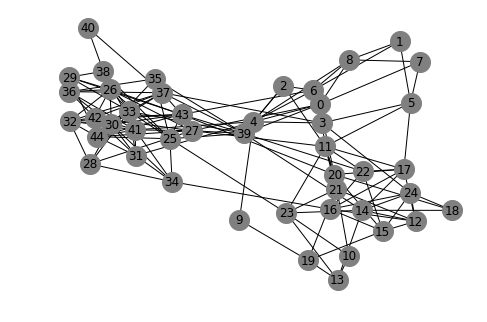

In [150]:
plt.figure(figsize = (6,4))
nx.draw(graph, pos, node_size = 400, node_color = 'gray', with_labels = True)
plt.show()

## To do

* Propose a clustering for this graph and compute the modularity.
* What is the strongest cluster? 
* Complete the function `get_cluster_strength` below and check your guess.
* Comment the results.

**Hint:** Recall that the strength of cluster $k$ is defined by: $$\frac{2w_k }{ v_k}.$$

In [370]:
#graph2 = graph.copy()
graph = graph2.copy()
pos = nx.spring_layout(graph)

In [371]:
c1 = [3,2,0,4,6,5,9,1,7,8]
c2 = [39,27,43,25,31,41,44,35,38,36,29,42,33,30,32,26,40,28,34,37]
c3 = [11,20,21,23,17,22,19,18,13,10,15,24,14,16,12]
C={}
for i in c1:
    C[i] = 0
for i in c2:
    C[i] = 1
for i in c3:
    C[i] = 2

In [372]:
def get_cluster_strength(graph,C):
    '''
    graph: networkx graph
        undirected graph (possibly weighted)
    C: dictionary
        cluster of each node
        
    Returns: dictionary
        strength of each cluster
    '''
    
    # add weights if none
    if nx.get_edge_attributes(graph,'weight') == {}:
        for u,v in graph.edges():
            graph[u][v]['weight'] = 1
    
    clusters = set(C.values())
    cluster_weight = {k: 0 for k in clusters}
    cluster_volume = {k: 0 for k in clusters}
    cluster_strength = {k: 0 for k in clusters}
    
    for k in clusters:
        for u,v in graph.edges():
            if (C[u]==k) or (C[v]==k):
                #if (C[u]==C[v]):
                #    cluster_weight[k]+= graph[u][v]['weight']
                cluster_weight[k]+= graph[u][v]['weight']
                
    for k in clusters:
        for u in graph.nodes():
            if (C[u]==k):
                cluster_volume[k]+=graph.degree[u]

    for k in clusters:
        cluster_strength[k]=2*cluster_weight[k]/cluster_volume[k]
    
    return cluster_strength

In [373]:
get_cluster_strength(graph,C)

{0: 1.2916666666666667, 1: 1.0849673202614378, 2: 1.1494252873563218}

## 2. The Louvain algorithm

The Louvain algorithm attempts to maximize modularity as follows:
1. **(Initialization)** $C \gets \text{identity}$ 
2.  **(Maximization)** While modularity increases, update $C$ by moving one node  from its cluster to one of its neighbors
3. **(Aggregation)** Merge all nodes belonging to the same cluster into a single node, update the weights accordingly and apply step 2 to the  aggregate graph

In step 2, nodes are considered in a cyclic way. The target cluster of a node is chosen among  its neighbors as that providing the **largest gain** in modularity, if any.

## To do

* Complete the function `maximize_modularity` corresponding to step 2.

In [400]:
def maximize_modularity(graph, resolution):
    '''
    graph: networkx graph
        undirected graph 
    resolution: float
        resolution parameter (positive)
        
    Returns: dictionary
        cluster of each node
    '''

    node_weight = {u: 0. for u in graph.nodes()}
    w = 0
    for u,v in graph.edges():
        node_weight[u] += graph[u][v]['weight']
        node_weight[v] += graph[u][v]['weight']
        w += graph[u][v]['weight']
    # init the clustering
    C = {u:u for u in graph.nodes()}
    # cluster weights
    cluster_weight = {u: node_weight[u] for u in graph.nodes()}
    # node-cluster weights (between each node and the clusters)
    node_cluster_weight = {u:{v: 1. * graph[u][v]['weight'] for v in graph.neighbors(u) if v != u} 
                           for u in graph.nodes()}
    increase = True
    while increase:
        increase = False
        for u in graph.nodes():
            k = C[u]            
            if k not in node_cluster_weight[u]:
                node_cluster_weight[u][k] = 0
            variation = {k:0}
            # to be completed
            #for nei in [value for value in list(graph.neighbors(u)) if value in list(C.values())]:
            #for nei in [value for value in list(graph.neighbors(u)) if (value in list(C.values()))&(C[value]!=C[u])&(value!=k)]:
            for nei in [value for value in list(graph.neighbors(u)) if (value in list(C.values()))&(value!=k)]:
                C_ = C.copy()
                C_[u] = C_[nei]
                variation[nei] = get_modularity(graph,C_) - get_modularity(graph,C)
            # to be completed
            l = max(variation, key = variation.get)
            if variation[l] > 0:
                print(u,"of",k,"to",l,"with variation",variation[l])
                increase = True
                # move node u from cluster k to cluster l
                C[u] = l
                cluster_weight[k] -= node_weight[u]
                cluster_weight[l] += node_weight[u]
                for v in graph.neighbors(u):
                    if v != u:
                        node_cluster_weight[v][k] -= graph[u][v]['weight']
                        if node_cluster_weight[v][k] <= 0:
                            node_cluster_weight[v].pop(k)
                        if l not in node_cluster_weight[v]:
                            node_cluster_weight[v][l] = 0
                        node_cluster_weight[v][l] += graph[u][v]['weight']
    return C

In [401]:
def aggregate_graph(graph,C):
    '''
    graph: networkx graph
        undirected graph 
    C: dictionary
        cluster of each node
        
    Returns: networkx graph
        aggregate graph with one node per cluster
    '''
    aggregate_graph_ = nx.Graph()
    aggregate_graph_.add_nodes_from(set(C.values()))
    for u,v in graph.edges():
        if aggregate_graph_.has_edge(C[u],C[v]):
            aggregate_graph_[C[u]][C[v]]['weight'] += graph[u][v]['weight']
        else:
            aggregate_graph_.add_edge(C[u],C[v])
            aggregate_graph_[C[u]][C[v]]['weight'] = graph[u][v]['weight']
    return aggregate_graph_

In [402]:
def louvain(graph,resolution = 1):
    '''
    graph: networkx graph
        undirected graph 
    resolution: float
        resolution parameter (positive)
        
    Returns: dictionary
        cluster of each node
    '''

    if nx.get_edge_attributes(graph,'weight') == {}:
        for u,v in graph.edges():
            graph[u][v]['weight'] = 1

    C = maximize_modularity(graph, resolution)
    n = len(C)
    k = len(set(C.values()))
    while k < n:
        aggregate_graph_ = aggregate_graph(graph,C) 
        C_new = maximize_modularity(aggregate_graph_, resolution)
        C = {u: C_new[C[u]] for u in graph.nodes()}
        n = k
        k = len(set(C_new.values()))
    # reindex clusters in decreasing order of size
    clusters = list(set(C.values()))
    cluster_size = {k: 0 for k in clusters}
    for u in C:
        cluster_size[C[u]] += 1
    cluster_index = sorted(cluster_size, key = cluster_size.get, reverse = True)
    reindex = {k:i for i,k in enumerate(cluster_index)}
    C = {u:reindex[C[u]] for u in C}
    return C

## To do

* Test your `louvain` function on the stochastic block model.

In [377]:
louvain_C = louvain(graph)
louvain_C

{0: 2,
 1: 2,
 2: 2,
 3: 2,
 4: 2,
 5: 2,
 6: 2,
 7: 2,
 8: 2,
 9: 1,
 10: 1,
 11: 3,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 3,
 18: 4,
 19: 1,
 20: 4,
 21: 1,
 22: 3,
 23: 1,
 24: 1,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 3,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0}

In [378]:
get_cluster_strength(graph,louvain_C)

{0: 1.1048951048951048,
 1: 1.3103448275862069,
 2: 1.3043478260869565,
 3: 1.7333333333333334,
 4: 1.8181818181818181}

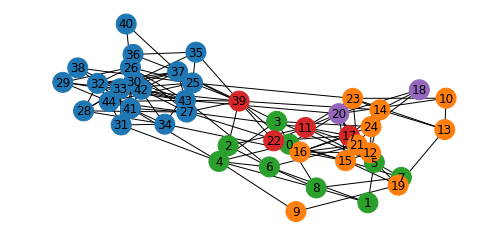

In [379]:
node_colors = [colors[louvain_C[u] % len(colors)] for u in graph.nodes()]
plt.figure(figsize = (6,3))
nx.draw(graph, pos, node_size = 400, node_color = node_colors, with_labels = True)
plt.show()

## To do

* Complete the function `maximize_modularity` corresponding to step 2.
* Test your `louvain` function on the stochastic block model.
* Test different resolution parameters.

## Real data

The function `get_clusters` below returns the clusters as lists of nodes in decreasing order of weight.

In [380]:
def get_clusters(graph, C):
    '''
    graph: networkx graph
        undirected graph 
    C: dictionary
        cluster of each node
        
    Returns: dictionary of lists
        for each cluster, nodes are listed in decreasing order of weight
    '''

    if nx.get_edge_attributes(graph,'weight') == {}:
        for u,v in graph.edges():
            graph[u][v]['weight'] = 1

    node_weight = {u: 0 for u in graph.nodes()}
    for u,v in graph.edges():
        node_weight[u] += graph[u][v]['weight']
        node_weight[v] += graph[u][v]['weight']
        
    clusters = list(set(C.values()))
    cluster_nodes = {k:{} for k in clusters}
    for u in graph.nodes():
        cluster_nodes[C[u]][u] = node_weight[u]

    cluster_nodes = {k: sorted(cluster_nodes[k], key = cluster_nodes[k].get, reverse = True)
                             for k in clusters}
        
    return cluster_nodes

In [381]:
get_clusters(graph,louvain_C)

{0: [30,
  43,
  26,
  33,
  42,
  25,
  37,
  41,
  44,
  27,
  32,
  31,
  34,
  36,
  28,
  29,
  35,
  38,
  40],
 1: [14, 16, 21, 12, 15, 23, 24, 13, 19, 10, 9],
 2: [4, 0, 6, 3, 5, 8, 2, 1, 7],
 3: [39, 11, 17, 22],
 4: [20, 18]}

In [382]:
get_clusters(graph,C)

{0: [4, 0, 6, 3, 5, 8, 2, 1, 7, 9],
 1: [30,
  43,
  26,
  33,
  39,
  42,
  25,
  37,
  41,
  44,
  27,
  32,
  31,
  34,
  36,
  28,
  29,
  35,
  38,
  40],
 2: [11, 20, 14, 16, 17, 21, 12, 15, 23, 24, 22, 13, 19, 10, 18]}

## To do

* List the top-3 characters of each cluster of Les Miserables (resolution 1).
* List the top-3 airports of each cluster of Openflights (resolutions 1 and 2); visualize the clusters, with the associate top airports.
* List the top-5 pages of the 20 largest clusters of Wikipedia for Schools (resolution 2). Compare the results obtained when the graph is considered as undirected and bipartite.
* List the top-5 actors in the cluster of **Marion Cotillard** in the actors-movies graph (resolution 10).

**Note:** You may compute the size and strength of each cluster.

In [383]:
miserables = nx.read_graphml("./../../archive/miserables.graphml", node_type = int)

In [384]:
openflights = nx.read_graphml("./../../archive/openflights.graphml", node_type = int)

In [385]:
wikipedia = nx.read_graphml("./../../archive/wikipedia_schools.graphml", node_type = int)

In [386]:
wikipedia_undirected = wikipedia.to_undirected()

## To do

* List the top-3 characters of each cluster of Les Miserables (resolution 1).

In [ ]:
C_L_m = louvain(openflights)
C_L_m

0 of 0 to 4 with variation 6.107739337692228e-05
1 of 1 to 2220 with variation 6.12390320002792e-05
2 of 2 to 2217 with variation 0.00012251734067539322


In [ ]:
get_clusters(miserables,C_L_m)

In [387]:
def bipartite_from_directed(graph):
    '''
    graph: networkx graph
        directed graph 
        
    Returns: networkx graph
        undirected, bipartite graph
    '''    
    new_graph = nx.Graph()
    nodes = list(graph.nodes())
    if nodes == list(np.arange(len(nodes))):
        new_graph.add_nodes_from(nodes)
        new_graph.add_nodes_from(list(np.arange(-len(nodes),0)))
        edges = [(u,-v-1) for u,v in graph.edges()]
        new_graph.add_edges_from(edges)
    else:
        print('Nodes must be indexed from 0 to n-1.')
    return new_graph

In [388]:
wikipedia_bipartite = bipartite_from_directed(wikipedia)

In [392]:
actors_movies = nx.read_graphml("./../../archive/actors_movies.graphml", node_type = int)

In [390]:
marion_cotillard = 5172

## 3. Soft clustering

We have so far considered **hard clustering** where the objective is to find a partition of the set of nodes. In practice, it may be interesting to allow some nodes to belong to several clusters. This is **soft clustering**. A simple approach consists in identifying so-called flipping nodes, for which a change of cluster has a negligible impact on modularity (for some given threshold). 

## To do

* Complete the function `get_flipping_nodes` below.
* Test your function on the bow-tie graph.
* Display the airports belonging to several clusters in Openflights (resolutions 1 and 2).

In [14]:
def get_flipping_nodes(graph, C, resolution = 1, threshold = 1e-5):
    '''
    graph: networkx graph
        undirected graph 
    C: dictionary
        cluster of each node
    resolution: float
        resolution parameter 
    threshold: float
        threshold on modularity 
        
    Returns: dictionary of lists
        list of clusters of each flipping node (i.e., with more than 1 cluster)
    '''

    flipping_nodes = {}
    # to be completed
    clusters = set(C.values())
    for k in graph.nodes():
        flipping_k = []
        copy = C
        for c in clusters :
            copy[k] = c
            print(copy)
            diff = abs(get_modularity(graph,copy) - get_modularity(graph,C))
            print(diff)
            if diff <= threshold:
                flipping_k.append(c)
        flipping_nodes[k] = flipping_k
        
    return flipping_nodes 

In [ ]:
bowtie = nx.star_graph(4)
bowtie.add_edges_from([(1,2),(3,4)])

In [ ]:
plt.figure(figsize = (6,3))
nx.draw(bowtie, node_size = 400, with_labels = True)
plt.show()